# Módulo 2 - Técnicas de Programação I

## --- Projeto: Análise de Dados com Pandas ---

### Equipe:
    -   Christian Dos Santos Oliveira
    -   Cleiton Rodrigues Tavares
    -   Lucas de Oliveira Noman
    -   Luis Felipe Costa⁠
    -   Roosevelt da Rocha Chaves Junior

### Escolha dos DataFrames de trabalho:

- [Histórico de jogos da Copa do Mundo](https://www.kaggle.com/datasets/abecklas/fifa-world-cup)

### Repositório da equipe:

- [GitHub](https://github.com/osantoschris/projeto-final-tec-programacao.git)

## 1. Análise Exploratória e Pré-Tratamento dos Dados

In [2]:
# importação das bibliotecas a serem utilizadas no projeto:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# carregamento dos DataFrames a serem utilizados no projeto:

df_wordlcup = pd.read_csv('WorldCups.csv', sep=',')
df_players = pd.read_csv('WorldCupPlayers.csv', encoding="utf-8")
df_matches = pd.read_csv('WorldCupMatches.csv', encoding="utf-8")

### 1.1. DataFrame 'WorldCups':

In [3]:
# acesso às informações principais

df_wordlcup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [4]:
# análise exploratória das colunas e registros do DataFrame:

print("Demonstração de 5 linhas contidas no DataFrame:", df_wordlcup.shape,"\n", df_wordlcup.sample(5).sort_index(), "\n")
print("O resumo das colunas númericas é:\n", df_wordlcup.describe())

Demonstração de 5 linhas contidas no DataFrame: (20, 10) 
     Year      Country      Winner   Runners-Up        Third       Fourth  \
4   1954  Switzerland  Germany FR      Hungary      Austria      Uruguay   
9   1974      Germany  Germany FR  Netherlands       Poland       Brazil   
15  1998       France      France       Brazil      Croatia  Netherlands   
17  2006      Germany       Italy       France      Germany     Portugal   
19  2014       Brazil     Germany    Argentina  Netherlands       Brazil   

    GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
4           140              16             26    768.607  
9            97              16             38  1.865.753  
15          171              32             64  2.785.100  
17          147              32             64  3.359.439  
19          171              32             64  3.386.810   

O resumo das colunas númericas é:
               Year  GoalsScored  QualifiedTeams  MatchesPlayed
count    20.000000    20

### 1.2. DataFrame 'WorldCupsPlayers':

In [5]:
# acesso às informações principais

df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [6]:
# análise exploratória das colunas e registros do DataFrame:

print("Demonstração de 5 linhas contidas no DataFrame:", df_players.shape,"\n", df_players.sample(5).sort_index(), "\n")
print("O resumo das colunas númericas é:\n", df_players.describe())

Demonstração de 5 linhas contidas no DataFrame: (37784, 9) 
        RoundID    MatchID Team Initials                   Coach Name Line-up  \
2657       208       1218           PAR  FLEITAS SOLICH Manuel (PAR)       S   
16341      308        533           ENG           ROBSON Bobby (ENG)       S   
23281     1014       8743           AUT       PROHASKA Herbert (AUT)       N   
33985   249719  300111114           ESP     DEL BOSQUE Vicente (ESP)       S   
35432   255931  300186511           NGA          KESHI Stephen (NGA)       N   

       Shirt Number        Player Name Position Event  
2657              0   Casiano CESPEDES      NaN   NaN  
16341             3       Kenny SANSOM      NaN   NaN  
23281            11  Martin AMERHAUSER      NaN   NaN  
33985            16             SERGIO      NaN   NaN  
35432            20             UCHEBO      NaN   NaN   

O resumo das colunas númericas é:
             RoundID       MatchID  Shirt Number
count  3.778400e+04  3.778400e+04  37

In [7]:
# coluna eventos se apresenta com muitos valores nulos:

print("Porcentagem de eventos nulos: ", sum(df_players['Event'].isnull())/len(df_players)*100, "%")
print("Número de eventos distintos: ", len(df_players['Event'].unique()))
df_players['Event'].unique()

# Leganda Coluna Event:

# - G = Goal
# - OG = Own Goal
# - Y = Yellow Card
# - R = Red Card
# - SY = Red Card by second yellow
# - P = Penalty
# - MP = Missed Penalty
# - I = Substitution In
# - O = Substitute Out

Porcentagem de eventos nulos:  75.9977768367563 %
Número de eventos distintos:  1894


array([nan, "G40'", "G70'", ..., "I66' Y73'", "I91' G105'", "I105' G107'"],
      dtype=object)

### 1.3. DataFrame 'WorldCupsMatches':

In [8]:
# acesso às informações principais

df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [9]:
# análise exploratória das colunas e registros do DataFrame:

print("Demonstração de 5 linhas contidas no DataFrame:", df_matches.shape,"\n", df_matches.sample(5).sort_index().iloc[:,0:5], "\n")
print("O resumo das colunas númericas é:\n", df_matches.describe())

Demonstração de 5 linhas contidas no DataFrame: (4572, 20) 
         Year              Datetime    Stage        Stadium          City
378   1986.0  07 Jun 1986 - 12:00   Group D  Tres de Marzo  Guadalajara 
1188     NaN                   NaN      NaN            NaN           NaN
2315     NaN                   NaN      NaN            NaN           NaN
3567     NaN                   NaN      NaN            NaN           NaN
4426     NaN                   NaN      NaN            NaN           NaN 

O resumo das colunas númericas é:
               Year  Home Team Goals  Away Team Goals     Attendance  \
count   852.000000       852.000000       852.000000     850.000000   
mean   1985.089202         1.811033         1.022300   45164.800000   
std      22.448825         1.610255         1.087573   23485.249247   
min    1930.000000         0.000000         0.000000    2000.000000   
25%    1970.000000         1.000000         0.000000   30000.000000   
50%    1990.000000         2.000000   

## 2. Análise Dos Dados

### Com base no que vimos, podemos inferir as seguintes perguntas, e testa-las na prática:

* Quais são os top 5 maiores campeões mundiais?
* Qual a média geral e maior público das copas?
* Qual a quantidade de seleções participantes?
* Qual a média de gols em finais de copas?
* Qual a quantidade de cartões amarelos em finais de copa?
* Qual a quantidade de cartões vermelhos após o segundo amarelo?
* Qual seleção goleou em uma final?
* Quais os maiores artilheiros das copas?

### 2.1. Quais são os top 5 maiores campeões mundiais:

<function matplotlib.pyplot.show(close=None, block=None)>

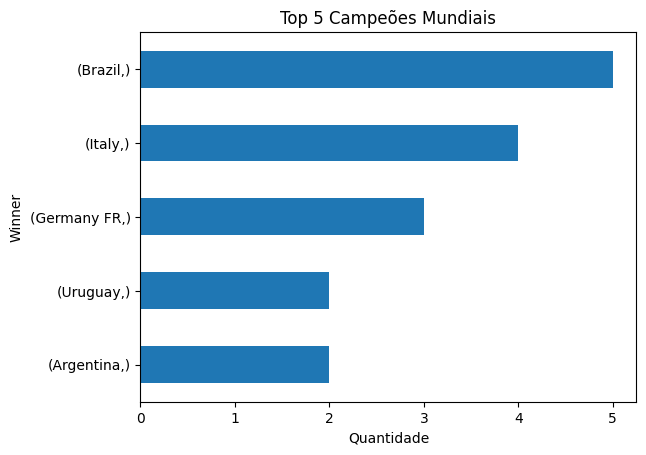

In [10]:
df_top = df_wordlcup.copy()
df_top = df_top.value_counts(['Winner']).head(5).sort_values()
df_top.plot.barh(x='Winner', y= 'Winner')

plt.xlabel('Quantidade')
plt.ylabel('Winner')
plt.title('Top 5 Campeões Mundiais')
plt.show

#### 2.1.1. Qual o resultado em copas do Brasil:

In [11]:
print("O Brasil ficou em segundo lugar:", df_wordlcup.value_counts(['Runners-Up'])['Brazil'], "vezes.")
print("O Brasil ficou em terceiro lugar:", df_wordlcup.value_counts(['Third'])['Brazil'], "vezes.")
print("O Brasil ficou em quarto lugar:", df_wordlcup.value_counts(['Fourth'])['Brazil'], "vezes.")

print("\nO Brasil ganhou as copas de:\n", df_wordlcup.loc[df_wordlcup['Winner']=='Brazil',['Year','Country']],"\n")
print("O Brasil foi vice-lugar nas copas de:\n", df_wordlcup.loc[df_wordlcup['Runners-Up']=='Brazil',['Year','Country']],"\n")
print("O Brasil ficou em terceiro nas copas de:\n", df_wordlcup.loc[df_wordlcup['Third']=='Brazil',['Year','Country']],"\n")

O Brasil ficou em segundo lugar: 2 vezes.
O Brasil ficou em terceiro lugar: 2 vezes.
O Brasil ficou em quarto lugar: 2 vezes.

O Brasil ganhou as copas de:
     Year      Country
5   1958       Sweden
6   1962        Chile
8   1970       Mexico
14  1994          USA
16  2002  Korea/Japan 

O Brasil foi vice-lugar nas copas de:
     Year Country
3   1950  Brazil
15  1998  France 

O Brasil ficou em terceiro nas copas de:
     Year    Country
2   1938     France
10  1978  Argentina 



### 2.2. Qual a média geral e maior público das copas:

Média de público em copas é:  1872882.35
Maior público total em uma edição de copa foi:  3587538


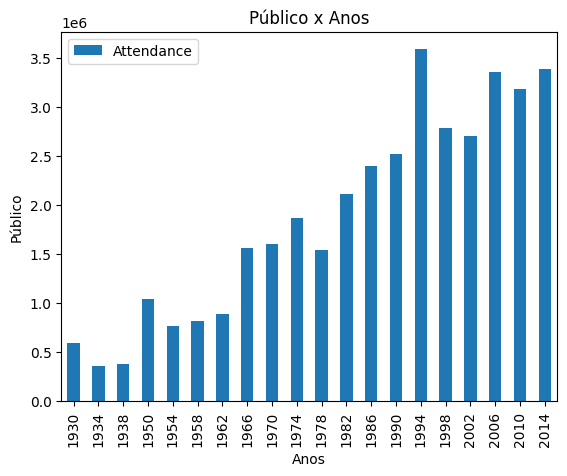

In [12]:
df_wordlcup_atteendance = df_wordlcup[['Year', 'Attendance']].copy()

df_wordlcup_atteendance['Attendance'] = df_wordlcup_atteendance['Attendance'].str.replace('.','', regex=True).astype(int)

df_wordlcup_atteendance.plot(kind='bar', x='Year',y='Attendance')

print("Média de público em copas é: ",np.mean(df_wordlcup_atteendance['Attendance']))
print("Maior público total em uma edição de copa foi: ",max(df_wordlcup_atteendance['Attendance']))

plt.xlabel('Anos')
plt.ylabel('Público')
plt.title('Público x Anos')
plt.show()

#### 2.2.1. Maior público em cada grupo de todas as copas:

In [13]:
df_matches_publico = df_matches.groupby(['Stage']).apply(lambda df: df.loc[df.Attendance.idxmax()])
df_matches_publico.loc[:,["Year","Datetime","Stadium","City","Attendance"]].head(5)

,Year,Datetime,Stadium,City,Attendance
Stage,,,,,
Final,1986.0,29 Jun 1986 - 12:00,Estadio Azteca,Mexico City,114600.0
First round,1938.0,05 Jun 1938 - 17:00,Stade Olympique,Colombes,30454.0
Group 1,1950.0,01 Jul 1950 - 15:00,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,142429.0
Group 2,1982.0,02 Jul 1982 - 21:00,Santiago Bernabeu,Madrid,90089.0
Group 3,1982.0,13 Jun 1982 - 20:00,Camp Nou,Barcelona,95000.0


#### 2.2.2. Melhores médias de público por estádio:

In [14]:
df_matches[['Attendance','Stadium']].groupby(['Stadium']).mean().sort_values(by="Attendance",ascending=False).head(5)

,Attendance
Stadium,
Maracan� - Est�dio Jornalista M�rio Filho,101692.625000
Estadio Azteca,100923.684211
Rose Bowl,92600.875000
Wembley Stadium,86448.222222
Soccer City Stadium,83857.375000


### 2.3. Qual a quantidade de seleções participantes:

In [15]:
df_matches_selecoes = pd.concat([df_matches['Home Team Initials'],df_matches['Away Team Initials']], axis=0)
print(len(df_matches_selecoes.unique()), "seleções já participaram das copas.")

83 seleções já participaram das copas.


### 2.4. Qual a média de gols em finais de copas:

In [16]:
df_matches_gols = df_matches.copy()

df_matches_gols = df_matches_gols[(df_matches_gols['Stage'] == 'Final')]

df_matches_gols['Year'] = df_matches_gols['Year'].astype(str).str.replace('.0', '', regex=False)

df_matches_gols['Total Goals'] = df_matches_gols['Home Team Goals'] + df_matches_gols['Away Team Goals']

media_gols_finais = df_matches_gols['Total Goals'].mean()
media_gols_finais_time_casa = df_matches_gols['Home Team Goals'].mean()
media_gols_finais_time_fora = df_matches_gols['Away Team Goals'].mean()

print(f'A média de gols em finais de copa é de: {math.ceil(media_gols_finais)}\nA média de gols em finais de copa dos times da casa é de: {math.ceil(media_gols_finais_time_casa)}\nA média de gols em finais de copa dos times visitantes é de: {math.ceil(media_gols_finais_time_fora)}')

A média de gols em finais de copa é de: 4
A média de gols em finais de copa dos times da casa é de: 3
A média de gols em finais de copa dos times visitantes é de: 2


#### 2.4.1. Quantos gols as maiores seleções fizeram:

In [17]:
df_goals = df_matches.copy()

df_goals[['Home Team Name', 'Away Team Name']] = df_goals[['Home Team Name', 'Away Team Name']].fillna('-')

df_home_goals = df_goals[['Home Team Name', 'Home Team Goals']].copy()

df_home_goals = df_home_goals.rename(columns={'Home Team Name':'Team Name'})

df_home_goals = df_home_goals.groupby('Team Name')

df_home_goals = df_home_goals['Home Team Goals'].sum()

# df_home_goals.head(20).sort_values(ascending=False)

In [17]:
df_away_goals = df_goals[['Away Team Name','Away Team Goals']].copy()

df_away_goals = df_away_goals.rename(columns={'Away Team Name':'Team Name'})

df_away_goals = df_away_goals.groupby('Team Name')

df_away_goals = df_away_goals['Away Team Goals'].sum()

# df_away_goals.sort_values(ascending=False).head(20)

In [18]:
df_total_goals = pd.merge(df_home_goals, df_away_goals, on='Team Name', how='inner')


df_total_goals['Total Goals'] = df_total_goals.apply(lambda x: x['Home Team Goals'] + x['Away Team Goals'], axis=1)

df_total_goals = df_total_goals.drop(['Home Team Goals', 'Away Team Goals'], axis=1)


df_total_goals.sort_values(by='Total Goals', ascending=False).head(5)

,Total Goals
Team Name,
Brazil,225.0
Argentina,133.0
Germany FR,131.0
Italy,128.0
France,108.0


### 2.5 Qual a quantidade de cartões amarelos em finais de copa:

In [24]:
df_players['Yellow Card'] = df_players['Event'].str.contains('Y')

df_players.fillna(False)

df_players_amarelo = df_players.loc[df_players['Yellow Card'] == True].copy()

df_final_cards = pd.merge(df_players_amarelo, df_matches, on='MatchID', how='inner')

df_final_cards = df_final_cards.loc[df_final_cards['Stage'] == 'Final']

total_yellow_cards = df_final_cards[['MatchID', 'Yellow Card']].shape[0]

print(f'Em finais de copa do mundo, ao todo já foram aplicados {total_yellow_cards} cartões amarelos.')

Em finais de copa do mundo, ao todo já foram aplicados 2 cartões amarelos.


### 2.6. Qual a quantidade de cartões vermelhos após o segundo amarelo:

In [18]:
df_players['Second Yellow Card'] = df_players['Event'].str.contains('SY')

df_players.fillna(False)

df_players_dois_amarelos = df_players.loc[df_players['Second Yellow Card'] == True].copy()

df_final_cards = pd.merge(df_players_dois_amarelos, df_matches, on='MatchID', how='inner')

df_final_cards = df_final_cards.loc[df_final_cards['Stage'] == 'Final']

total_red_cards = df_final_cards[['MatchID', 'Second Yellow Card']].shape[0]

print(f'Em finais de copa do mundo, ao todo já foram aplicados {total_red_cards} cartões vermelhos, por acúmulo de cartões amarelos.')

Em finais de copa do mundo, ao todo já foram aplicados 2 cartões vermelhos, por acúmulo de cartões amarelos.


### 2.7. Qual seleção goleou em uma final:

In [19]:
df_matches[['Home Team Initials', 'Away Team Initials']] = df_matches[['Home Team Initials', 'Away Team Initials']].fillna('-')
df_matches['MatchID'] = df_matches['MatchID']
df_matches[['Home Team Goals', 'Away Team Goals']] = df_matches[['Home Team Goals', 'Away Team Goals']].fillna(0).astype(int)

df_matches[['MatchID', 'Stage', 'Home Team Goals', 'Away Team Goals', 'Home Team Initials', 'Away Team Initials']].loc[df_matches['Stage'] == 'Final'].max()

MatchID               300186501.0
Stage                       Final
Home Team Goals                 5
Away Team Goals                 3
Home Team Initials            URU
Away Team Initials            TCH
dtype: object

### 2.8. Quais os maiores artilheiros das copas:

In [3]:
# Envontra todos os gols do dataset

df_players = pd.read_csv('WorldCupPlayers.csv')

df_players['Event'] = df_players['Event'].fillna('-')

df_goals = df_players.loc[df_players['Event'].str.contains('G')].copy()

df_goals

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
14,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19'
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45'
...,...,...,...,...,...,...,...,...,...
37619,255955,300186474,GER,LOEW Joachim (GER),S,18,KROOS,NaN,G24' G26'
37631,255955,300186474,GER,LOEW Joachim (GER),N,9,SCH�RRLE,NaN,I58' G69' G79'
37701,255957,300186502,NED,Louis VAN GAAL (NED),S,5,BLIND,NaN,G17' O70'
37713,255957,300186502,NED,Louis VAN GAAL (NED),S,20,WIJNALDUM,NaN,G90'


In [4]:
# Realiza a contagem dos gols

df_goals['Goals'] = df_players['Event'].apply(lambda x: x.count('G'))

df_goals

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Goals
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40',1
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70',1
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87',2
14,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19',1
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45',1
...,...,...,...,...,...,...,...,...,...,...
37619,255955,300186474,GER,LOEW Joachim (GER),S,18,KROOS,NaN,G24' G26',2
37631,255955,300186474,GER,LOEW Joachim (GER),N,9,SCH�RRLE,NaN,I58' G69' G79',2
37701,255957,300186502,NED,Louis VAN GAAL (NED),S,5,BLIND,NaN,G17' O70',1
37713,255957,300186502,NED,Louis VAN GAAL (NED),S,20,WIJNALDUM,NaN,G90',1


In [8]:
# Identifica os 5 maiores artilheiros

df_artilheiros = df_goals.groupby('Player Name').sum('Goals').copy().sort_values(by='Goals', ascending=False).copy()

df_artilheiros.head(5).drop(columns=['RoundID', 'MatchID', 'Shirt Number'], axis=1)

,Goals
Player Name,
KLOSE,17
RONALDO,16
Just FONTAINE,13
Gerd MUELLER,13
PEL� (Edson Arantes do Nascimento),12
